In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt

In [78]:
cancer_data = datasets.load_breast_cancer()

features = cancer_data.data
labels = cancer_data.target

In [79]:
features.shape

(569, 30)

In [80]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [101]:
depth_range = [i for i in range(3, 13)]
gini_test_score_lst = []
gini_train_score_lst = []
best_test_score = -1
best_train_score = -1

for depth in depth_range:
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model_gini.fit(x_train, y_train)
    train_score, test_score = model_gini.score(x_train, y_train), model_gini.score(x_test, y_test)
    
    gini_test_score_lst.append(test_score)
    gini_train_score_lst.append(train_score)
    
    if best_train_score < train_score:
        best_train_score = train_score
    if best_test_score < test_score:
        best_test_score = test_score


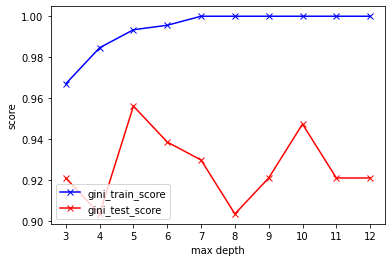

In [102]:
# score를 plotting해 봅시다!
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(depth_range)), gini_train_score_lst, '-x', c='blue', label="gini_train_score")
ax.plot(range(len(depth_range)), gini_test_score_lst, '-x', c='red', label="gini_test_score")
plt.xticks(range(len(depth_range)), depth_range)
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


In [103]:
depth_range = [i for i in range(3, 13)]
entropy_test_score_lst = []
entropy_train_score_lst = []
best_test_score = -1
best_train_score = -1

for depth in depth_range:
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model_entropy.fit(x_train, y_train)
    train_score, test_score = model_entropy.score(x_train, y_train), model_entropy.score(x_test, y_test)
    
    entropy_test_score_lst.append(test_score)
    entropy_train_score_lst.append(train_score)
    
    if best_train_score < train_score:
        best_train_score = train_score
    if best_test_score < test_score:
        best_test_score = test_score

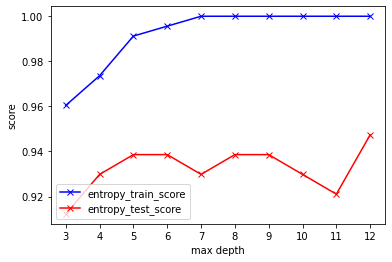

In [104]:
# score를 plotting해 봅시다!
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(depth_range)), entropy_train_score_lst, '-x', c='blue', label="entropy_train_score")
ax.plot(range(len(depth_range)), entropy_test_score_lst, '-x', c='red', label="entropy_test_score")
plt.xticks(range(len(depth_range)), depth_range)
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


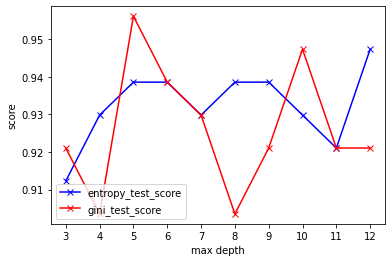

In [105]:
# score를 plotting해 봅시다!
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(depth_range)), entropy_test_score_lst, '-x', c='blue', label="entropy_test_score")
ax.plot(range(len(depth_range)), gini_test_score_lst, '-x', c='red', label="gini_test_score")
plt.xticks(range(len(depth_range)), depth_range)
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()


In [116]:
depth_range = [i for i in range(3, 13)]
best_of_gini = []
best_of_entropy = []

for i in range(10):
    
    best_test_score = -1
    
    for depth in depth_range:
        model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        model_gini.fit(x_train, y_train)
        test_score = model_gini.score(x_test, y_test)

        if best_test_score < test_score:
            best_test_score = test_score
        
    best_of_gini.append(best_test_score)
            
    best_test_score = -1

    for depth in depth_range:
        model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        model_entropy.fit(x_train, y_train)
        test_score = model_entropy.score(x_test, y_test)

        if best_test_score < test_score:
            best_test_score = test_score
            
    best_of_entropy.append(best_test_score)

In [117]:
best_test_score

0.9473684210526315

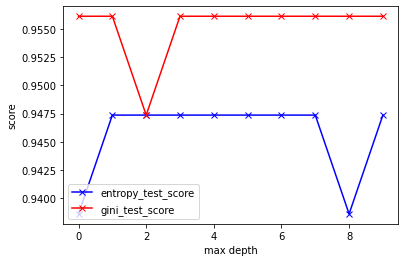

In [118]:
# score를 plotting해 봅시다!
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(10), best_of_entropy, '-x', c='blue', label="entropy_test_score")
ax.plot(range(10), best_of_gini, '-x', c='red', label="gini_test_score")
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend(loc='lower left')
plt.show()